In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
path_to_image = path_to_image = "/content/drive/MyDrive/pickles"

In [3]:
X_train = pickle.load(open("/content/drive/MyDrive/pickles/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/pickles/y_train.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/pickles/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/pickles/y_val.pickle", "rb"))

X_test = pickle.load(open("/content/drive/MyDrive/pickles/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/pickles/y_test.pickle", "rb"))

In [4]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     weights = 'imagenet',
                                                     input_shape = (128,128,3),
                                                     pooling="max")

9420800/9406464 [==============================] - 0s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [7]:
head_model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [8]:
head_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [9]:
history = head_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
13/13 [==============================] - 24s 2s/step - loss: 1.4915 - accuracy: 0.5806 - val_loss: 0.3543 - val_accuracy: 0.8600
Epoch 2/25
13/13 [==============================] - 18s 1s/step - loss: 0.2714 - accuracy: 0.8938 - val_loss: 0.1917 - val_accuracy: 0.9500
Epoch 3/25
13/13 [==============================] - 33s 3s/step - loss: 0.2676 - accuracy: 0.9112 - val_loss: 0.1398 - val_accuracy: 0.9400
Epoch 4/25
13/13 [==============================] - 18s 1s/step - loss: 0.1715 - accuracy: 0.9281 - val_loss: 0.1548 - val_accuracy: 0.9400
Epoch 5/25
13/13 [==============================] - 18s 1s/step - loss: 0.1352 - accuracy: 0.9563 - val_loss: 0.1288 - val_accuracy: 0.9500
Epoch 6/25
13/13 [==============================] - 18s 1s/step - loss: 0.0997 - accuracy: 0.9606 - val_loss: 0.1356 - val_accuracy: 0.9500
Epoch 7/25
13/13 [==============================] - 18s 1s/step - loss: 0.1106 - accuracy: 0.9581 - val_loss: 0.1145 - val_accuracy: 0.9550
Epoch 8/25
13/13 [==

In [10]:
head_model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 304ms/step - loss: 0.2223 - accuracy: 0.9300


[0.22229842841625214, 0.9300000071525574]

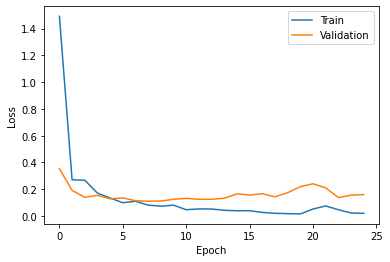

In [11]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

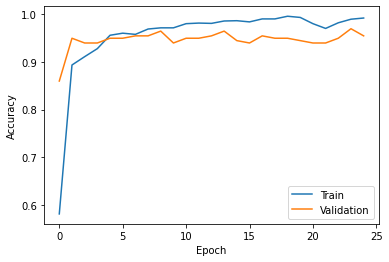

In [12]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
head_model.save("trained_model")